# EDA
- Pearson heatmap

In [1]:
import pickle
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

## Load data

In [2]:
with open('pickles/dangjin_merged.pkl','rb') as f:
    dangjin_merged = pickle.load(f)
with open('pickles/ulsan_merged.pkl','rb') as f:
    ulsan_merged = pickle.load(f)

## Pearson coefficient heatmap

In [3]:
dangjin_merged.columns

Index(['time', 'Temperature_obs', 'Humidity_obs', 'Cloud_obs', 'Wind_X_obs',
       'Wind_Y_obs', 'Temperature_fcst', 'Humidity_fcst', 'Cloud_fcst',
       'Wind_X_fcst', 'Wind_Y_fcst', 'dangjin_floating', 'dangjin_warehouse',
       'dangjin', 'Day_cos', 'Day_sin', 'Year_cos', 'Year_sin'],
      dtype='object')

In [4]:
# column name list
obs_column_name = list(dangjin_merged.columns[1:6])
fcst_column_name = list(dangjin_merged.columns[6:11])
energy_column_name = list(dangjin_merged.columns[11:14])
dangjin_column_name = list(dangjin_merged.columns[13:14])
seasonality_column_name = list(dangjin_merged.columns[-4:])

In [5]:
# corr function
def show_corr_heatmap(data, col_name_list, figsize=(12,5)):
    corr = data.loc[:,col_name_list].corr()
    mask = np.zeros_like(corr)
    for i in range(mask.shape[0]):
        mask[i,i]=True

    plt.figure(figsize=figsize)
    sns.heatmap(corr,annot=True,mask=mask,cmap='coolwarm',vmin=-1,vmax=1)
    plt.show()


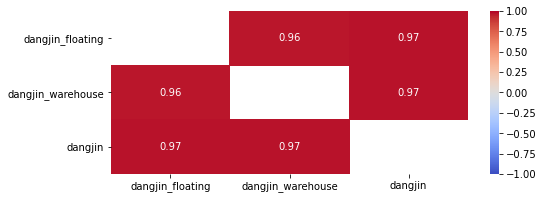

In [6]:
# within energy
show_corr_heatmap(dangjin_merged, energy_column_name, figsize=(8,3))

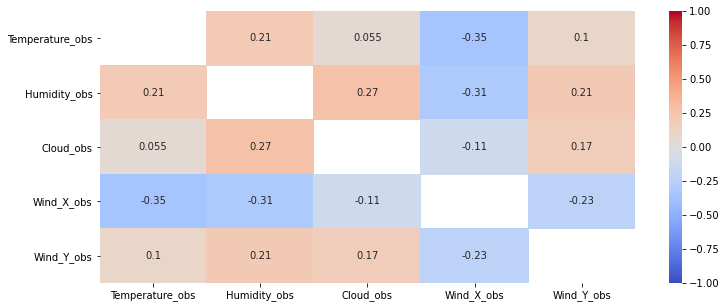

In [7]:
# within obs
show_corr_heatmap(dangjin_merged, obs_column_name)

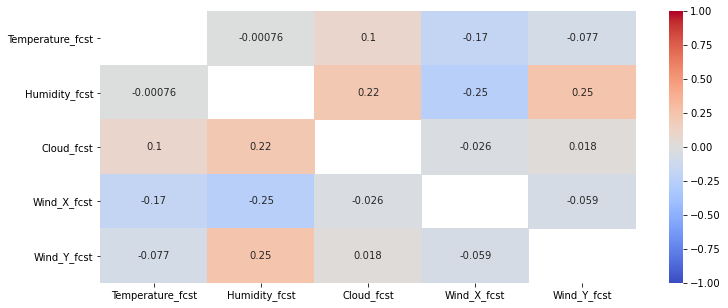

In [8]:
# within fcst
show_corr_heatmap(dangjin_merged, fcst_column_name)

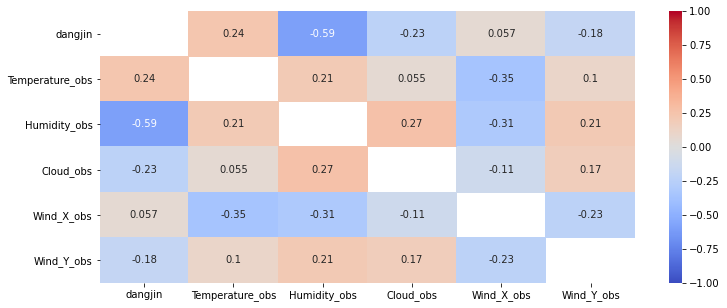

In [9]:
# dangjin - obs
show_corr_heatmap(dangjin_merged, dangjin_column_name+obs_column_name)

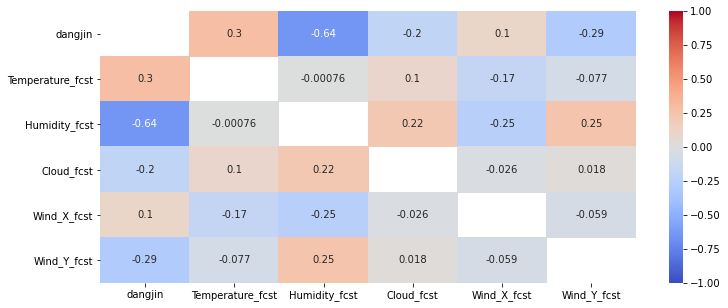

In [10]:
# dangjin - fcst
show_corr_heatmap(dangjin_merged, dangjin_column_name+fcst_column_name)

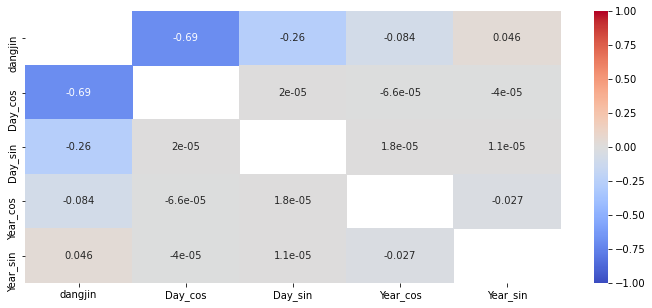

In [11]:
# dangjin - seasonality
show_corr_heatmap(dangjin_merged, dangjin_column_name+seasonality_column_name)

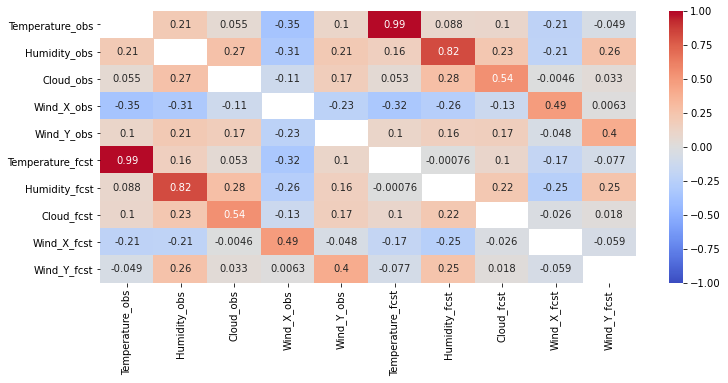

In [12]:
# obs - fcst
show_corr_heatmap(dangjin_merged, obs_column_name+fcst_column_name)

## Ulsan

In [13]:
obs_column_name = list(ulsan_merged.columns[1:6])
fcst_column_name = list(ulsan_merged.columns[6:11])
ulsan_column_name = list(ulsan_merged.columns[11:12])
seasonality_column_name = list(ulsan_merged.columns[-4:])

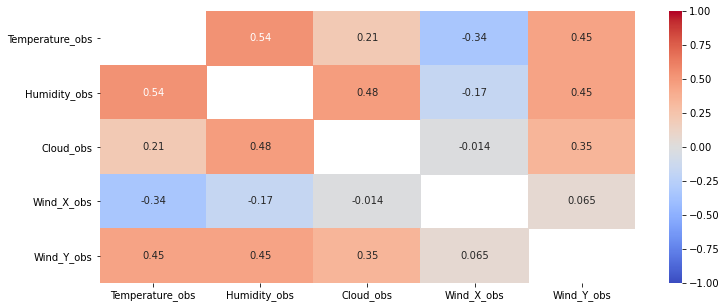

In [14]:
# obs
show_corr_heatmap(ulsan_merged, obs_column_name)

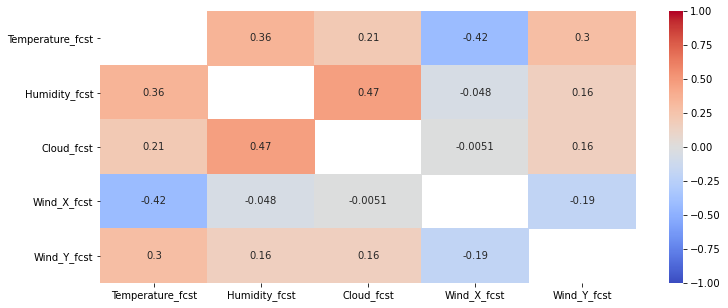

In [15]:
# fcst
show_corr_heatmap(ulsan_merged, fcst_column_name)

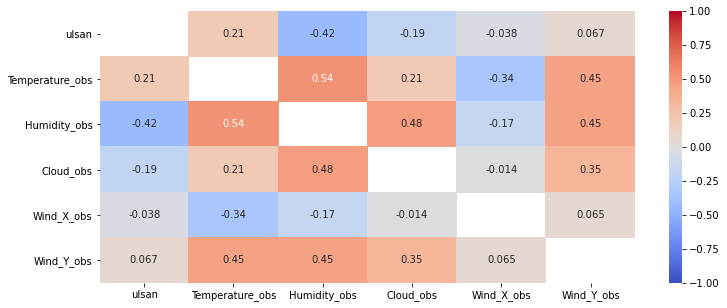

In [16]:
# ulsan - obs
show_corr_heatmap(ulsan_merged, ulsan_column_name+obs_column_name)

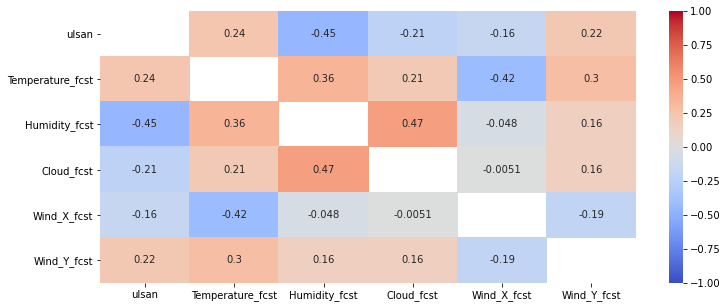

In [17]:
# ulsan - fcst
show_corr_heatmap(ulsan_merged, ulsan_column_name+fcst_column_name)

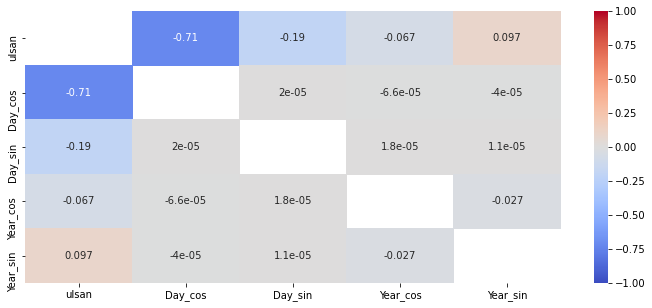

In [18]:
# ulsan - seasonality
show_corr_heatmap(ulsan_merged, ulsan_column_name+seasonality_column_name)

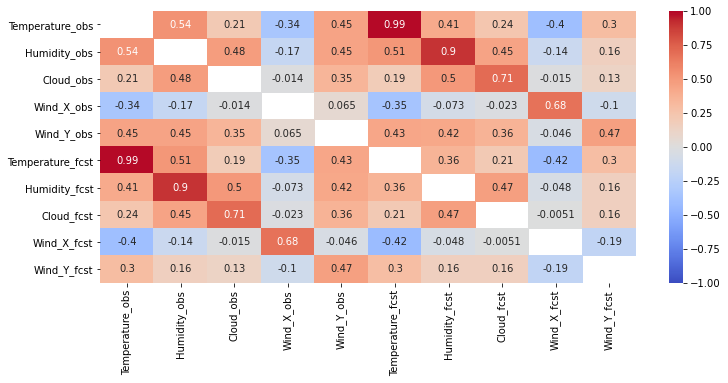

In [19]:
# obs - fcst
show_corr_heatmap(ulsan_merged, obs_column_name+fcst_column_name)